# Py Punto 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
import scipy as sp
from statsmodels.tsa.arima_process import arma_acf
from statsmodels.tsa.arima_process import ArmaProcess
import statsmodels as sm
import statsmodels.api as smapi
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acovf
from statsmodels.tsa.arima_model import ARIMA

## Lectura de datos

In [2]:
data2=pd.ExcelFile('/Users/FAMILIA MORENO/Documents/FMpy/Base_Accidentes.xlsx')
data2=data2.parse('DATA2005')
print(data2)
ind = pd.date_range(start='1/1/2005', end='8/1/2018', freq='M')
accidentes2 = data2.set_index(ind)
ise = pd.Series(accidentes2['ISE'],index=ind)
print(ise.dtypes)

     PERIODO  MES         ISE          IC         IPI   AUTP     CC   VTP  \
0       2005    1   60.842819   96.015131   73.130942   6779   2584  1704   
1       2005    2   58.102236   96.427825   76.057927   7676   3338  1836   
2       2005    3   61.605652   97.154694   80.341499   7862   3065  1924   
3       2005    4   61.451999  100.029444   83.286585   9102   3309  2145   
4       2005    5   62.881086   99.777720   82.145464   9128   3010  2122   
5       2005    6   62.213696   99.257910   81.862093   8934   3157  2238   
6       2005    7   62.323030   99.936440   80.295759   8656   2827  2251   
7       2005    8   63.286986  100.391170   85.703585   9258   3087  2371   
8       2005    9   66.124889  101.140357   86.114859   9833   3295  3164   
9       2005   10   66.441413  101.829158   86.464809   9117   3171  3069   
10      2005   11   69.082554  102.746840   88.294695   9868   3152  1911   
11      2005   12   72.525088  105.293311   85.707781  11374   3317  1556   

## Transformación Box Cox

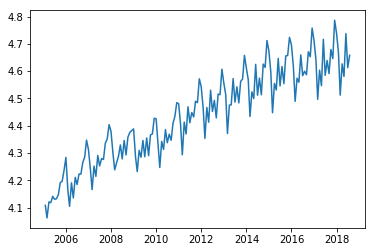

In [3]:
import scipy.stats #En ocasiones puede funcionar la línea 46 sin ésta línea.
sp.stats.boxcox(ise,alpha=0.05) 
# puntual:0.38568476045603883, IC:(-0.53832814338045, 1.315345161221509)
# cero está en el intervalo luego transformar datos con logaritmo    
logise=sp.stats.boxcox(ise,lmbda=0) 
serielogise=pd.Series(logise, index=ind)  
plt.plot(serielogise) 

## Descomposiciòn  usando filtros de promedios móviles

2005-01-31         NaN
2005-02-28         NaN
2005-03-31         NaN
2005-04-30         NaN
2005-05-31         NaN
2005-06-30         NaN
2005-07-31    4.158068
2005-08-31    4.162199
2005-09-30    4.166884
2005-10-31    4.170519
2005-11-30    4.174136
2005-12-31    4.179283
2006-01-31    4.185308
2006-02-28    4.192213
2006-03-31    4.198406
2006-04-30    4.205187
2006-05-31    4.213572
2006-06-30    4.219443
2006-07-31    4.223814
2006-08-31    4.229549
2006-09-30    4.234666
2006-10-31    4.240495
2006-11-30    4.247116
2006-12-31    4.253296
2007-01-31    4.258491
2007-02-28    4.263093
2007-03-31    4.268271
2007-04-30    4.273972
2007-05-31    4.279090
2007-06-30    4.284237
                ...   
2016-02-29    4.615736
2016-03-31    4.617749
2016-04-30    4.618208
2016-05-31    4.619435
2016-06-30    4.621506
2016-07-31    4.623117
2016-08-31    4.624376
2016-09-30    4.625916
2016-10-31    4.626615
2016-11-30    4.628453
2016-12-31    4.630869
2017-01-31    4.632559
2017-02-28 

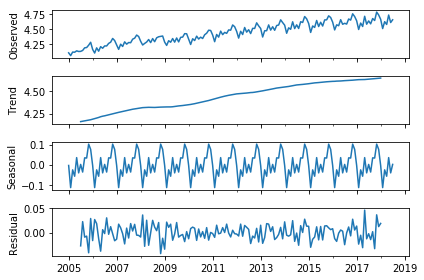

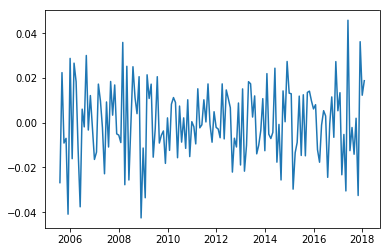

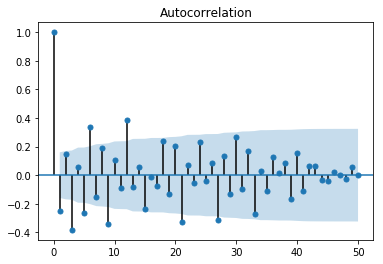

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

result = seasonal_decompose(serielogise, model='additive')
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)
result.plot()
pyplot.show()

residu=pd.Series(result.resid)
resi=pd.Series(residu[6:157,]) # remover los NaN
# va desde  -0.026777 hasta 0.018847
plt.plot(resi)
acf(resi, nlags=50,unbiased=False)
ResISE=plot_acf(resi,lags=50,unbiased=False, alpha=0.05)

## Descomposicion usando suavizamiento exponencial

2005-01-31    4.108294
2005-02-28    4.062204
2005-03-31    4.120754
2005-04-30    4.118256
2005-05-31    4.141245
2005-06-30    4.130575
2005-07-31    4.132331
2005-08-31    4.147680
2005-09-30    4.191545
2005-10-31    4.196321
2005-11-30    4.235302
2005-12-31    4.283933
2006-01-31    4.165045
2006-02-28    4.104605
2006-03-31    4.190791
2006-04-30    4.135461
2006-05-31    4.210843
2006-06-30    4.184497
2006-07-31    4.223025
2006-08-31    4.222708
2006-09-30    4.265146
2006-10-31    4.285449
2006-11-30    4.347417
2006-12-31    4.312720
2007-01-31    4.241178
2007-02-28    4.166108
2007-03-31    4.252085
2007-04-30    4.214060
2007-05-31    4.291147
2007-06-30    4.252515
                ...   
2016-02-29    4.489405
2016-03-31    4.574086
2016-04-30    4.559434
2016-05-31    4.659728
2016-06-30    4.583508
2016-07-31    4.599742
2016-08-31    4.586990
2016-09-30    4.671214
2016-10-31    4.652879
2016-11-30    4.757922
2016-12-31    4.712076
2017-01-31    4.641834
2017-02-28 

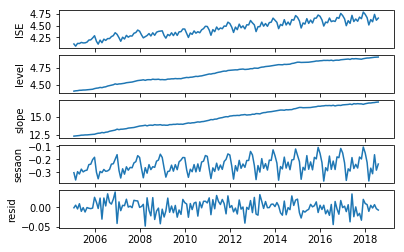

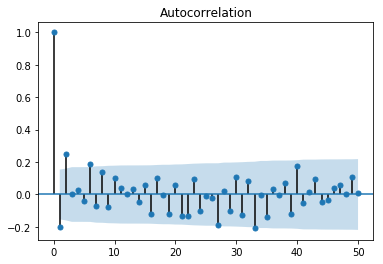

In [9]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
print(serielogise)
#print(pd.infer_freq(data['Month'], warn=True))
fitISE = ExponentialSmoothing(serielogise, seasonal_periods=12, trend='add', seasonal='add').fit(use_boxcox=True)
####ejecutar desde la línea 74 hasta la 88
plt.subplot(5, 1, 1)
plt.plot(serielogise)
plt.ylabel('ISE') 
plt.subplot(5, 1, 2)
plt.plot(fitISE.level)
plt.ylabel('level') 
plt.subplot(5, 1, 3)
plt.plot(fitISE.slope)
plt.ylabel('slope') 
plt.subplot(5, 1, 4)
plt.plot(fitISE.season)
plt.ylabel('sesaon') 
plt.subplot(5, 1, 5)
plt.plot(fitISE.resid)
plt.ylabel('resid') 

acf(fitISE.resid, nlags=50,unbiased=False )
ResISEHW=plot_acf(fitISE.resid,lags=50,unbiased=False, alpha=0.05)

# ACC

int64


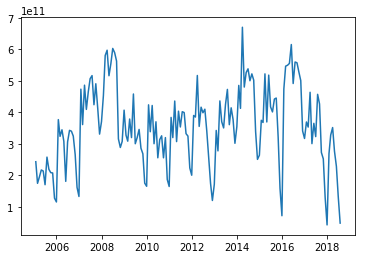

In [7]:
ACC = pd.Series(accidentes2['ACC'],index=ind)
print(ACC.dtypes)
sp.stats.boxcox(ACC,alpha=0.05) 
# puntual:3.3578573249357277, IC:(2.3351419676936227, 4.4591166580092825)
UACC=sp.stats.boxcox(ACC,lmbda=3.3578573249357277) 
serieUACC=pd.Series(UACC, index=ind)  
plt.plot(serieUACC) 

## Descomposición  usando filtros de promedios móviles

2005-01-31             NaN
2005-02-28             NaN
2005-03-31             NaN
2005-04-30             NaN
2005-05-31             NaN
2005-06-30             NaN
2005-07-31    2.014028e+11
2005-08-31    2.132006e+11
2005-09-30    2.256456e+11
2005-10-31    2.356731e+11
2005-11-30    2.381053e+11
2005-12-31    2.424079e+11
2006-01-31    2.516261e+11
2006-02-28    2.602179e+11
2006-03-31    2.701066e+11
2006-04-30    2.773709e+11
2006-05-31    2.812305e+11
2006-06-30    2.833929e+11
2006-07-31    2.881516e+11
2006-08-31    2.937407e+11
2006-09-30    3.012068e+11
2006-10-31    3.113327e+11
2006-11-30    3.274046e+11
2006-12-31    3.476256e+11
2007-01-31    3.632411e+11
2007-02-28    3.739938e+11
2007-03-31    3.844276e+11
2007-04-30    3.974895e+11
2007-05-31    4.106681e+11
2007-06-30    4.276201e+11
                  ...     
2016-02-29    4.409475e+11
2016-03-31    4.492178e+11
2016-04-30    4.601703e+11
2016-05-31    4.752586e+11
2016-06-30    4.930918e+11
2016-07-31    4.989622e+11
2

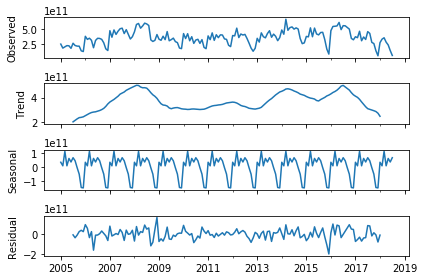

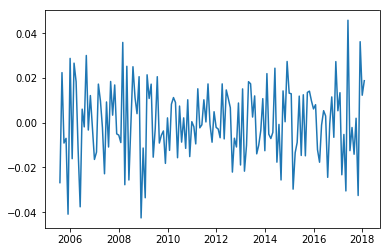

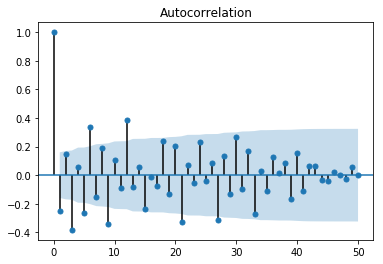

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

resultACC = seasonal_decompose(serieUACC, model='additive')
print(resultACC.trend)
print(resultACC.seasonal)
print(resultACC.resid)
print(resultACC.observed)
resultACC.plot()
pyplot.show()

residuACC=pd.Series(resultACC.resid)
resiACC=pd.Series(residu[6:157,]) # remover los NaN

plt.plot(resiACC)
acf(resiACC, nlags=50,unbiased=False)
ResACC=plot_acf(resiACC,lags=50,unbiased=False, alpha=0.05)

## Descomposición usando suavizamiento exponencial

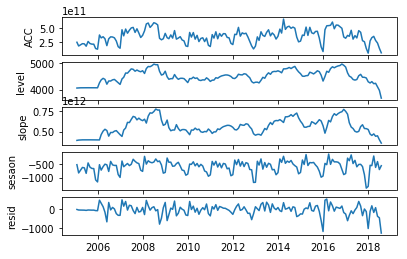

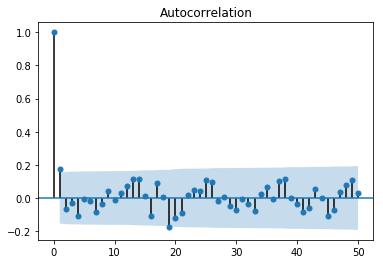

In [10]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
fitACC = ExponentialSmoothing(ACC, seasonal_periods=12, trend='add', seasonal='add').fit(use_boxcox=True)
plt.subplot(5, 1, 1)
plt.plot(serieUACC)
plt.ylabel('ACC') 
plt.subplot(5, 1, 2)
plt.plot(fitACC.level)
plt.ylabel('level') 
plt.subplot(5, 1, 3)
plt.plot(fitACC.slope)
plt.ylabel('slope') 
plt.subplot(5, 1, 4)
plt.plot(fitACC.season)
plt.ylabel('sesaon') 
plt.subplot(5, 1, 5)
plt.plot(fitACC.resid)
plt.ylabel('resid') 

acf(fitACC.resid, nlags=50,unbiased=False )
ResACCHW=plot_acf(fitACC.resid,lags=50,unbiased=False, alpha=0.05)

# Py Punto 3

## Simulación IID

             muestra
2005-01-31 -1.970837
2005-02-28 -0.945326
2005-03-31  0.192536
2005-04-30  2.458427
2005-05-31  3.199755
2005-06-30 -0.798829
2005-07-31 -2.928367
2005-08-31 -2.767733
2005-09-30  4.250644
2005-10-31 -0.805740
2005-11-30  0.915812
2005-12-31  3.834570
2006-01-31 -1.360232
2006-02-28 -0.389148
2006-03-31 -1.161190
2006-04-30 -2.191832
2006-05-31  1.599511
2006-06-30  2.131400
2006-07-31 -3.747477
2006-08-31  1.963421
2006-09-30 -0.471934
2006-10-31  0.367253
2006-11-30  0.395738
2006-12-31 -2.613077
2007-01-31 -0.621742
2007-02-28 -1.981826
2007-03-31  3.830503
2007-04-30  4.371696
2007-05-31  0.168067
2007-06-30 -2.357912
...              ...
2019-03-31  3.194188
2019-04-30 -1.303680
2019-05-31  1.067306
2019-06-30  2.015977
2019-07-31  1.244444
2019-08-31 -0.678859
2019-09-30  1.304251
2019-10-31  0.337706
2019-11-30  1.624436
2019-12-31  0.785121
2020-01-31  0.287686
2020-02-29 -3.460445
2020-03-31  1.290831
2020-04-30 -0.227004
2020-05-31 -4.142833
2020-06-30 -0

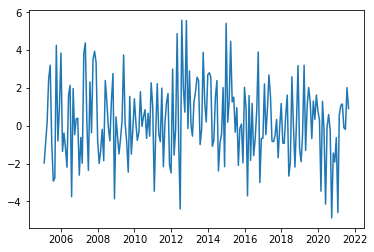

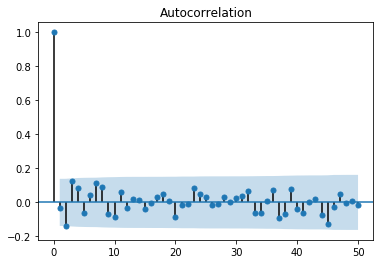

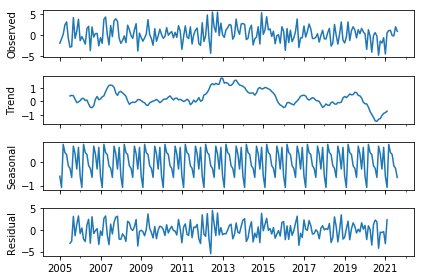

2005-07-31   -3.068429
2005-08-31   -2.576225
2005-09-30    3.159872
2005-10-31   -1.322743
2005-11-30    1.298672
2005-12-31    3.248781
2006-01-31   -0.817222
2006-02-28    0.464534
2006-03-31   -2.124607
2006-04-30   -2.660247
2006-05-31    1.185796
2006-06-30    2.479309
2006-07-31   -3.050161
2006-08-31    3.076515
2006-09-30   -0.815978
2006-10-31   -0.134656
2006-11-30    0.319418
2006-12-31   -3.355931
2007-01-31   -0.213262
2007-02-28   -1.254513
2007-03-31    2.673600
2007-04-30    3.248021
2007-05-31   -1.145382
2007-06-30   -3.398917
2007-07-31    1.363958
2007-08-31   -0.918026
2007-09-30    1.777667
2007-10-31    2.974590
2007-11-30    3.189082
2007-12-31   -2.105960
                ...   
2018-09-30   -2.771970
2018-10-31    0.003541
2018-11-30    3.533713
2018-12-31   -2.099817
2019-01-31   -1.678682
2019-02-28    0.297462
2019-03-31    2.044308
2019-04-30   -2.255291
2019-05-31    0.258879
2019-06-30    1.660016
2019-07-31    0.824954
2019-08-31   -0.685758
2019-09-30 

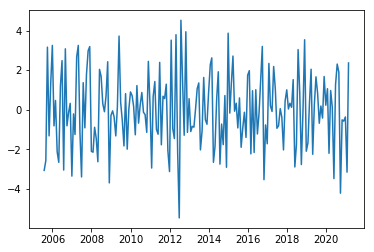

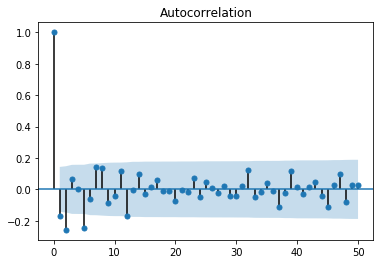

In [25]:
n=200 #Tamaño de la serie
l=50 #condiciones iniciales
theta=0.5 
phi=0.5
sigma=2

muestra={'muestra': np.random.normal(0, 2, 200)}
simIID=pd.DataFrame(muestra)
ind = pd.date_range(start='1/1/2005', periods=200, freq='M')
simIID.index= ind 
print(simIID)
plt.plot(simIID)
acf(simIID,nlags=50,unbiased=False)
IIDp=plot_acf(simIID,lags=50,unbiased=False)
#sp.stats.boxcox(serieIID,alpha=0.05) #raise ValueError("Data must be positive.") 
#Descomposición  usando filtros de promedios móviles
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
resultIID = seasonal_decompose(simIID, model='additive')
print(resultIID.trend)
print(resultIID.seasonal)
print(resultIID.resid)
# va desde -1.34 hasta -2.58
print(resultIID.observed)
resultIID.plot()
pyplot.show()

resiIID=resultIID.resid['muestra'][6:194,] # remover los NaN
print(resiIID)
plt.plot(resiIID)
acf(resiIID, nlags=50,unbiased=False)
ResIID=plot_acf(resiIID,lags=50,unbiased=False, alpha=0.05)

## Descomposición usando suavizamiento exponencial

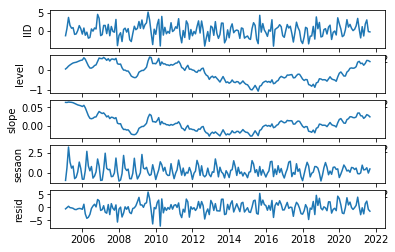

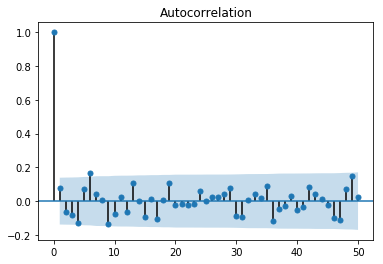

In [19]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
fitIID = ExponentialSmoothing(simIID, seasonal_periods=12, trend='add', seasonal='add').fit(use_boxcox=False)
plt.subplot(5, 1, 1)
plt.plot(simIID)
plt.ylabel('IID') 
plt.subplot(5, 1, 2)
plt.plot(fitIID.level)
plt.ylabel('level') 
plt.subplot(5, 1, 3)
plt.plot(fitIID.slope)
plt.ylabel('slope') 
plt.subplot(5, 1, 4)
plt.plot(fitIID.season)
plt.ylabel('sesaon') 
plt.subplot(5, 1, 5)
plt.plot(fitIID.resid)
plt.ylabel('resid') 

acf(fitIID.resid, nlags=50,unbiased=False )
ResIIDHW=plot_acf(fitIID.resid,lags=50,unbiased=False, alpha=0.05)

## Simulación MA(1)

            muestraMA1
2005-01-31   -0.013624
2005-02-28   -1.021399
2005-03-31    0.328022
2005-04-30   -1.003692
2005-05-31   -1.125601
2005-06-30   -0.964380
2005-07-31   -1.276170
2005-08-31    4.078197
2005-09-30    2.145160
2005-10-31    2.886365
2005-11-30   -0.191162
2005-12-31   -0.244327
2006-01-31   -0.928608
2006-02-28    0.093113
2006-03-31    3.691716
2006-04-30    5.560335
2006-05-31    3.599430
2006-06-30    1.777555
2006-07-31    0.533886
2006-08-31    0.851548
2006-09-30    3.185527
2006-10-31   -1.772441
2006-11-30   -2.127768
2006-12-31   -2.140058
2007-01-31    1.119125
2007-02-28   -1.367679
2007-03-31    0.520601
2007-04-30   -1.361480
2007-05-31   -3.177740
2007-06-30    1.996959
...                ...
2019-03-31   -0.561571
2019-04-30    0.062946
2019-05-31    2.040640
2019-06-30    0.417600
2019-07-31   -0.482876
2019-08-31    0.433121
2019-09-30   -0.603570
2019-10-31   -0.029809
2019-11-30   -3.244466
2019-12-31   -3.416680
2020-01-31    0.180678
2020-02-29 

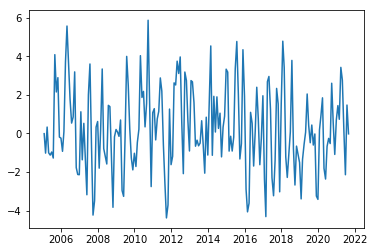

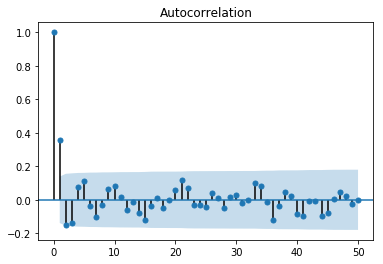

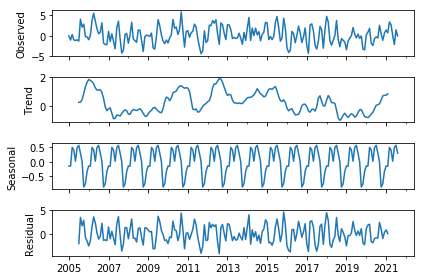

2005-07-31   -2.108011
2005-08-31    3.510154
2005-09-30    1.688397
2005-10-31    2.897248
2005-11-30   -0.766978
2005-12-31   -1.561006
2006-01-31   -2.619993
2006-02-28   -1.534177
2006-03-31    1.501949
2006-04-30    3.611703
2006-05-31    2.316888
2006-06-30    0.177493
2006-07-31   -1.148639
2006-08-31   -0.583320
2006-09-30    2.241526
2006-10-31   -1.414602
2006-11-30   -1.315460
2006-12-31   -1.484249
2007-01-31    1.453231
2007-02-28   -1.092527
2007-03-31    0.514677
2007-04-30   -0.896552
2007-05-31   -2.352309
2007-06-30    2.128115
2007-07-31    3.656265
2007-08-31   -0.282991
2007-09-30   -3.726829
2007-10-31   -2.244357
2007-11-30    1.347188
2007-12-31    1.272752
                ...   
2018-09-30   -1.685466
2018-10-31    1.085697
2018-11-30    0.326960
2018-12-31   -0.685964
2019-01-31   -2.587955
2019-02-28   -0.403723
2019-03-31   -0.418037
2019-04-30    0.184393
2019-05-31    2.617629
2019-06-30    0.687206
2019-07-31   -0.358927
2019-08-31    0.586124
2019-09-30 

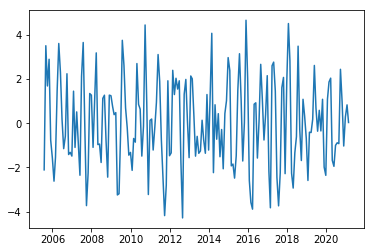

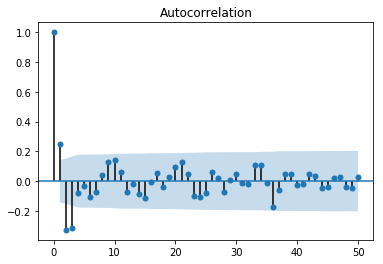

In [26]:
ruido=np.random.normal(0, sigma, n+l)
MA1aux=np.zeros(n+l)
for t in range(1,n+l):
    MA1aux[t]=theta*ruido[t-1]+ruido[t]


muestraMA={'muestraMA1': MA1aux[(l-1):(n+l-1)]}
MA1=pd.DataFrame(muestraMA)
ind = pd.date_range(start='1/1/2005', periods=200, freq='M')
MA1.index= ind 
print(MA1)
plt.plot(MA1)
acf(MA1,nlags=50,unbiased=False)
x=plot_acf(MA1,lags=50,unbiased=False, alpha=0.05)
#sp.stats.boxcox(MA1,alpha=0.05) #raise ValueError("Data must be positive.") 
#Descomposición  usando filtros de promedios móviles
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

resultMA1 = seasonal_decompose(MA1, model='additive')
print(resultMA1.trend)
print(resultMA1.seasonal)
print(resultMA1.resid)
print(resultMA1.observed)
resultMA1.plot()
pyplot.show()

resiMA1=resultMA1.resid['muestraMA1'][6:194,] # remover los NaN
# va desde  -0.026777 hasta 0.018847
print(resiMA1)
plt.plot(resiMA1)
acf(resiMA1, nlags=50,unbiased=False)
ResMA1=plot_acf(resiMA1,lags=50,unbiased=False, alpha=0.05)

## Descomposición usando suavizamiento exponencial

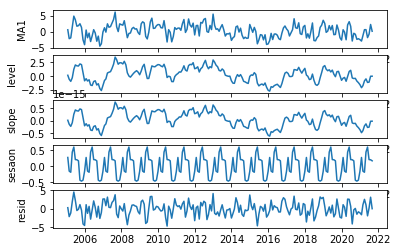

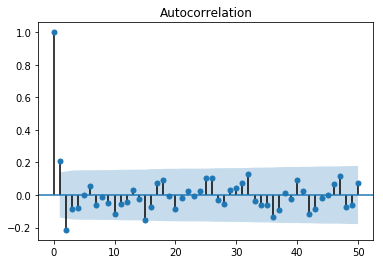

In [18]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
fitMA1= ExponentialSmoothing(MA1, seasonal_periods=12, trend='add', seasonal='add').fit(use_boxcox=False)
###
plt.subplot(5, 1, 1)
plt.plot(MA1)
plt.ylabel('MA1') 
plt.subplot(5, 1, 2)
plt.plot(fitMA1.level)
plt.ylabel('level') 
plt.subplot(5, 1, 3)
plt.plot(fitMA1.slope)
plt.ylabel('slope') 
plt.subplot(5, 1, 4)
plt.plot(fitMA1.season)
plt.ylabel('sesaon') 
plt.subplot(5, 1, 5)
plt.plot(fitMA1.resid)
plt.ylabel('resid') 

acf(fitMA1.resid, nlags=50,unbiased=False )
ResMA1HW=plot_acf(fitMA1.resid,lags=50,unbiased=False, alpha=0.05)

## Simulación AR(1)

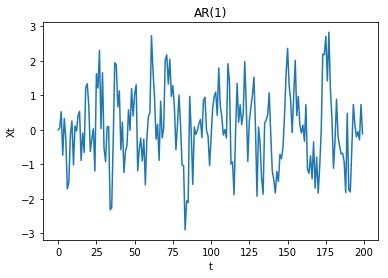

In [36]:
import statistics as stats
from statsmodels.tsa.tsatools import lagmat, lagmat2ds, add_trend

def AR(k, h, phi):
    ### Generación de la muestra
    np.random.seed(4)
    muestra=np.random.normal(0,1,k)
    #print(muestra)
    #len(muestra)
    
    ### asignación de índices ###
    ind=np.arange(1,k+1,1)
    len(ind)
    autor=pd.Series(muestra,index=ind)
    #print(autor)
    
    ### Ciclo para calcular iterativamente X_t=phi*X_t-1+ Z_t
    xt=[0]                       # Porque X_0=0
    for i in range (1,k+1):      
        x=phi*xt[i-h]+autor[i]   #X_t=phi*X_t-1+ Z_t
        xt.append(x)
    #print(xt)
    #len(xt)
    
    ### Gráfico 
    t=np.arange(0,k+1,1)
    AR=pd.Series(xt,index=t)
    plt.plot(AR)
    plt.ylabel('Xt')
    plt.xlabel('t')
    plt.title('AR(1)') 
    return(xt) 
    
xt=AR(199,1,0.5)

            muestraAR1
2005-01-31    0.000000
2005-02-28    0.050562
2005-03-31    0.525232
2005-04-30   -0.733293
2005-05-31    0.326952
2005-06-30   -0.254825
2005-07-31   -1.711990
2005-08-31   -1.503702
2005-09-30   -0.153276
2005-10-31    0.255612
2005-11-30   -1.019671
2005-12-31    0.108834
2006-01-31   -0.033570
2006-02-28    0.408288
2006-03-31    0.536397
2006-04-30   -0.888618
2006-05-31   -0.093312
2006-06-30   -0.653543
2006-07-31    1.220208
2006-08-31    1.333445
2006-09-30    0.712858
2006-10-31   -0.626562
2006-11-30   -0.258849
2006-12-31    0.030469
2007-01-31   -1.193714
2007-02-28    1.626503
2007-03-31    1.207547
2007-04-30    2.296131
2007-05-31    0.035253
2007-06-30    1.653374
...                ...
2019-03-31   -1.835060
2019-04-30   -1.062777
2019-05-31   -0.023315
2019-06-30    2.191906
2019-07-31    2.173588
2019-08-31    2.704035
2019-09-30    1.419990
2019-10-31    2.825731
2019-11-30    1.171607
2019-12-31    0.333606
2020-01-31   -1.115280
2020-02-29 

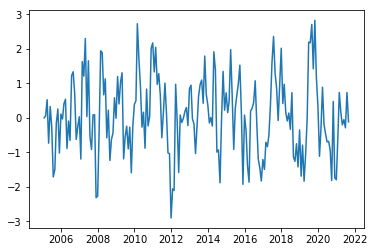

In [38]:
muestraAR={'muestraAR1': xt}
AR1=pd.DataFrame(muestraAR)
ind = pd.date_range(start='1/1/2005', periods=200, freq='M')
AR1.index= ind 
print(AR1)
plt.plot(AR1)

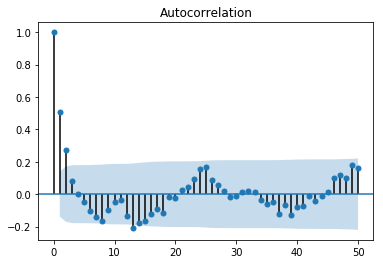

In [39]:
acf(AR1,nlags=50,unbiased=False)
x=plot_acf(AR1,lags=50,unbiased=False, alpha=0.05)

            muestraAR1
2005-01-31         NaN
2005-02-28         NaN
2005-03-31         NaN
2005-04-30         NaN
2005-05-31         NaN
2005-06-30         NaN
2005-07-31   -0.343862
2005-08-31   -0.330356
2005-09-30   -0.314985
2005-10-31   -0.320992
2005-11-30   -0.344975
2005-12-31   -0.379099
2006-01-31   -0.273538
2006-02-28   -0.033148
2006-03-31    0.121155
2006-04-30    0.120487
2006-05-31    0.115430
2006-06-30    0.143866
2006-07-31    0.092262
2006-08-31    0.094681
2006-09-30    0.173405
2006-10-31    0.334067
2006-11-30    0.472122
2006-12-31    0.573600
2007-01-31    0.596618
2007-02-28    0.429689
2007-03-31    0.309631
2007-04-30    0.313240
2007-05-31    0.257482
2007-06-30    0.076353
...                ...
2019-03-31   -0.064193
2019-04-30    0.196505
2019-05-31    0.453468
2019-06-30    0.589896
2019-07-31    0.642276
2019-08-31    0.685128
2019-09-30    0.817427
2019-10-31    0.967129
2019-11-30    0.985009
2019-12-31    0.846208
2020-01-31    0.606967
2020-02-29 

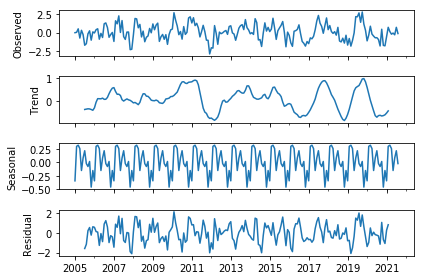

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

resultAR1 = seasonal_decompose(AR1, model='additive')
print(resultAR1.trend)
print(resultAR1.seasonal)
print(resultAR1.resid)
print(resultAR1.observed)
resultAR1.plot()
pyplot.show()

2005-07-31   -1.585562
2005-08-31   -1.152377
2005-09-30    0.237096
2005-10-31    0.558693
2005-11-30   -0.216825
2005-12-31    0.637955
2006-01-31    0.581427
2006-02-28    0.142338
2006-03-31    0.094697
2006-04-30   -1.266346
2006-05-31   -0.059266
2006-06-30   -0.880361
2006-07-31    0.910511
2006-08-31    1.259733
2006-09-30    0.614840
2006-10-31   -0.978542
2006-11-30   -0.273100
2006-12-31   -0.393110
2007-01-31   -1.448873
2007-02-28    0.897716
2007-03-31    0.577371
2007-04-30    1.725650
2007-05-31   -0.072752
2007-06-30    1.494069
2007-07-31   -0.770057
2007-08-31   -0.966372
2007-09-30    0.048319
2007-10-31    0.001047
2007-11-30   -1.903770
2007-12-31   -2.113169
                ...   
2018-09-30   -0.536622
2018-10-31    0.004573
2018-11-30   -0.142380
2018-12-31    0.521844
2019-01-31   -0.792360
2019-02-28   -0.752975
2019-03-31   -2.091412
2019-04-30   -1.516523
2019-05-31   -0.327306
2019-06-30    1.519059
2019-07-31    1.313877
2019-08-31    2.039875
2019-09-30 

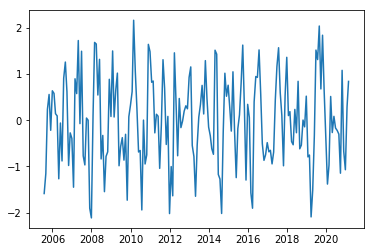

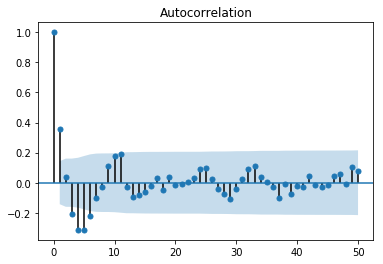

In [41]:
resiAR1=resultAR1.resid['muestraAR1'][6:194,] # remover los NaN
print(resiAR1)
plt.plot(resiAR1)
acf(resiAR1, nlags=50,unbiased=False)
ResAR1=plot_acf(resiAR1,lags=50,unbiased=False, alpha=0.05)

## Descomposicón usando suavizamiento exponencial

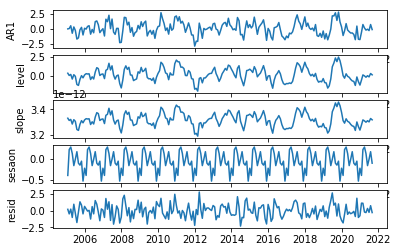

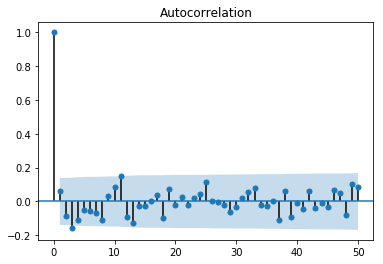

In [42]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
fitAR1= ExponentialSmoothing(AR1, seasonal_periods=12, trend='add', seasonal='add').fit(use_boxcox=False)
plt.subplot(5, 1, 1)
plt.plot(AR1)
plt.ylabel('AR1') 
plt.subplot(5, 1, 2)
plt.plot(fitAR1.level)
plt.ylabel('level') 
plt.subplot(5, 1, 3)
plt.plot(fitAR1.slope)
plt.ylabel('slope') 
plt.subplot(5, 1, 4)
plt.plot(fitAR1.season)
plt.ylabel('sesaon') 
plt.subplot(5, 1, 5)
plt.plot(fitAR1.resid)
plt.ylabel('resid') 

acf(fitAR1.resid, nlags=50,unbiased=False )
ResMA1HW=plot_acf(fitAR1.resid,lags=50,unbiased=False, alpha=0.05)